In [1]:
!pip install openpyxl seaborn matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# prompt: load dataset

import pandas as pd
df = pd.read_csv('/content/Online Retail.csv')

print(df.head()) # Display the first few rows of the dataframe
print(df.info()) # Display information about the dataframe and its columns
print(df.describe()) # Display descriptive statistics

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   

In [38]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [39]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-01-12 08:26:00       2.55     17850.0  United Kingdom  
1 2010-01-12 08:26:00       3.39     17850.0  United Kingdom  
2 2010-01-12 08:26:00       2.75     17850.0  United Kingdom  
3 2010-01-12 08:26:00       3.39     17850.0  United Kingdom  
4 2010-01-12 08:26:00       3.39     17850.0  United Kingdom  


In [40]:
df = df[df['Country'] == 'United Kingdom']

# Check if dataset is empty after cleaning
if df.empty:
    print("❗ Dataset is empty after cleaning. Please adjust filters or check the data.")

In [42]:
#STEP 3: FEATURE ENGINEERING
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [43]:
def get_cohort_index(df):
    year_diff = df['InvoiceMonth'].dt.year - df['CohortMonth'].dt.year
    month_diff = df['InvoiceMonth'].dt.month - df['CohortMonth'].dt.month
    return year_diff * 12 + month_diff + 1

df['CohortIndex'] = get_cohort_index(df)

In [47]:
#BUILD COHORT TABLE
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

if cohort_counts.empty or cohort_counts.shape[1] == 0:
    print("❗ No cohorts found. Please ensure dataset has repeat customers.")
else:
        # Calculate retention
        cohort_sizes = cohort_counts.iloc[:, 0]
        retention = cohort_counts.divide(cohort_sizes, axis=0)

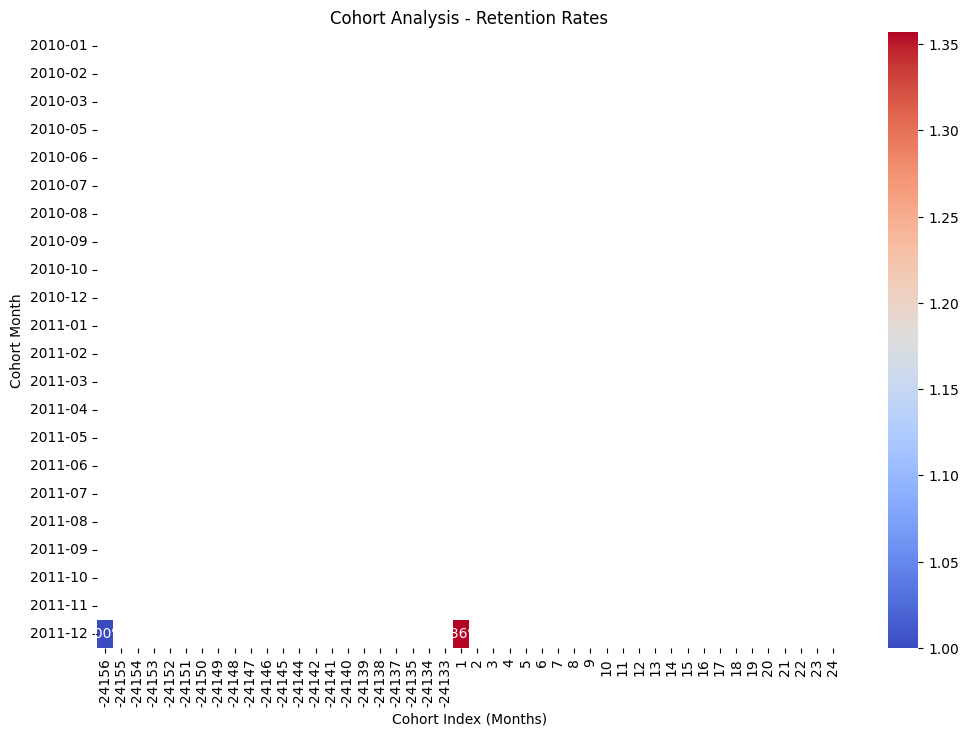

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='coolwarm')
plt.title('Cohort Analysis - Retention Rates')
plt.xlabel('Cohort Index (Months)')
plt.ylabel('Cohort Month')
plt.show()

In [50]:
  display(cohort_counts)

CohortIndex,-24156,-24155,-24154,-24153,-24152,-24151,-24150,-24149,-24148,-24147,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,18.0,26.0,33.0,26.0,24.0,19.0,24.0,21.0,20.0
2010-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,16.0,22.0,28.0,18.0,19.0,28.0,29.0,17.0,NaN
2010-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,12.0,9.0,9.0,5.0,10.0,7.0,5.0,NaN,NaN
2010-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,15.0,20.0,13.0,15.0,19.0,NaN,NaN,NaN,NaN
2010-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,12.0,10.0,15.0,4.0,NaN,NaN,NaN,NaN,NaN
2010-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,7.0,12.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,24.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
